Importing Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, roc_curve, auc, roc_auc_score, r2_score

Loading in Data

In [5]:
data_csv_fname = "../data/finalized_bzfd_data.csv"
bzfd_df = pd.read_csv(data_csv_fname, sep=',', index_col=0)

Y = bzfd_df['viralIndicator']
X = bzfd_df.iloc[:,20:-1]

In [6]:
bzfd_df.groupby('viralIndicator').count()

,videoId,duration,publishedAt,title,liveBroadcastContent,categoryId,commentCount,dislikeCount,favoriteCount,likeCount,...,traffic,environment,review,diet,hunting,disney,netflix,yummy,fans,red
viralIndicator,,,,,,,,,,,,,,,,,,,,,
0,3071,3071,3071,3071,3071,3071,3052,3053,3071,3053,...,3071,3071,3071,3071,3071,3071,3071,3071,3071,3071
1,3347,3347,3347,3347,3347,3347,3343,3346,3347,3346,...,3347,3347,3347,3347,3347,3347,3347,3347,3347,3347


Splitting into Training/Test Data

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=519)

In [4]:
def fitted_rfc(params):
    rfc = RandomForestClassifier(**params)
    fitted_rfc = rfc.fit(X_train, Y_train)
    return fitted_rfc

def ClassifierMetrics (X_train, Y_train, X_test, Y_test, fitted_model):
    Y_pred = fitted_model.predict_proba(X_test)[:,1]
    train_accuracy = fitted_model.score(X_train, Y_train)
    test_accuracy = fitted_model.score(X_test, Y_test)
    test_auc = roc_auc_score(Y_test, Y_pred)
    test_r2 = r2_score(Y_test, Y_pred)
    return train_accuracy, test_accuracy, test_auc, test_r2

In [17]:
params = {'criterion': 'entropy',
                  'n_estimators': 115,
                  'random_state':519,
                  'min_samples_split': 24}
fitted_model = fitted_rfc(params)

In [18]:
train_accuracy, test_accuracy, test_auc, test_r2 = ClassifierMetrics(X_train, Y_train, X_test, Y_test, fitted_model)
print(train_accuracy, test_accuracy, test_auc, test_r2)

0.7974289053369692 0.6417445482866043 0.7095616514807761 0.13255119292177542


In [27]:
 params = {'criterion': 'entropy',
                  'n_estimators': 115,
                  'random_state':519,
                  'min_samples_split': 24,
                  'max_depth': 20,}
fitted_model = fitted_rfc(params)
train_accuracy, test_accuracy, test_auc, test_r2 = ClassifierMetrics(X_train, Y_train, X_test, Y_test, fitted_model)
print(train_accuracy, test_accuracy, test_auc, test_r2)

0.7185430463576159 0.6526479750778816 0.7140822343277968 0.13611464488654734


In [33]:
 params = {'criterion': 'entropy',
                  'n_estimators': 115,
                  'random_state':519,
                  'min_samples_split': 24,
                  'min_samples_leaf': 20}
fitted_model = fitted_rfc(params)
train_accuracy, test_accuracy, test_auc, test_r2 = ClassifierMetrics(X_train, Y_train, X_test, Y_test, fitted_model)
print(train_accuracy, test_accuracy, test_auc, test_r2)

0.6488118426178419 0.6417445482866043 0.7019521250136491 0.10511792627500305


In [ ]:
https://stats.stackexchange.com/questions/53240/practical-questions-on-tuning-random-forests

In [6]:
max([estimator.tree_.max_depth for estimator in fitted_model.estimators_])

96

In [12]:
rfc_model_params = {'n_estimators':[],'min_samples_split':[],'max_depth':[],'min_samples_leaf':[],'train_accuracy':[],'test_accuracy':[],'test_auc':[], 'test_r2':[]}
estimators = [ 100,  115, 120, 125]
depths = [5,10,15,20,25,30,40,50,60,70,80,95]
leaves = [2,5,10,20,25,30,50,100,110,150,200]
for i in estimators:
    print(i)
    for j in range(2,50):
        for d in depths:
            params = {'criterion': 'entropy',
                      'n_estimators': i,
                      'random_state':519,
                      'min_samples_split': j,
                      'min_samples_leaf': l,
                      'max_depth': d,
                      }
            fitted_model = fitted_rfc(params)
            rfc_model_params['n_estimators'].append(i)
            rfc_model_params['min_samples_split'].append(j)
            rfc_model_params['min_samples_leaf'].append(l)
            rfc_model_params['max_depth'].append(d)
            train_accuracy, test_accuracy, test_auc, test_r2 = ClassifierMetrics(X_train, Y_train, X_test, Y_test, fitted_model)
            rfc_model_params['train_accuracy'].append(train_accuracy)
            rfc_model_params['test_accuracy'].append(test_accuracy)
            rfc_model_params['test_auc'].append(test_auc)
            rfc_model_params['test_r2'].append(test_r2)

100
115
120
125


In [ ]:
rfc_model_params = {'n_estimators':[],'min_samples_split':[],'max_depth':[],'min_samples_leaf':[],'train_accuracy':[],'test_accuracy':[],'test_auc':[], 'test_r2':[]}
estimators = [ 100,  115, 120, 125]
depths = [5,10,15,20,25,30,40,50,60,70,80,95]
leaves = [2,5,10,20,25,30,50,100,110,150,200]
for i in estimators:
    print(i)
    for j in range(2,50):
                params = {'criterion': 'entropy',
                          'n_estimators': i,
                          'random_state':519,
                          'min_samples_split': j,
                          'min_samples_leaf': l,
                          'max_depth': d,
                          }
                fitted_model = fitted_rfc(params)
                rfc_model_params['n_estimators'].append(i)
                rfc_model_params['min_samples_split'].append(j)
                rfc_model_params['min_samples_leaf'].append(l)
                rfc_model_params['max_depth'].append(d)
                train_accuracy, test_accuracy, test_auc, test_r2 = ClassifierMetrics(X_train, Y_train, X_test, Y_test, fitted_model)
                rfc_model_params['train_accuracy'].append(train_accuracy)
                rfc_model_params['test_accuracy'].append(test_accuracy)
                rfc_model_params['test_auc'].append(test_auc)
                rfc_model_params['test_r2'].append(test_r2)

In [44]:
rfc_pd = pd.DataFrame(rfc_model_params)
# to_csv('../data/random_forest_results_ac_2.csv',sep=',')
rfc_pd_og = pd.read_csv('../data/random_forest_results_ac_2.csv',sep=',',index_col=0)

In [50]:
rfc_pd[rfc_pd['max_depth'] == 95]

,n_estimators,min_samples_split,max_depth,min_samples_leaf,train_accuracy,test_accuracy,test_auc,test_r2
11,100,2,95,25,0.643358,0.640966,0.698140,0.098487
23,100,3,95,25,0.643358,0.640966,0.698140,0.098487
35,100,4,95,25,0.643358,0.640966,0.698140,0.098487
47,100,5,95,25,0.643358,0.640966,0.698140,0.098487
59,100,6,95,25,0.643358,0.640966,0.698140,0.098487
...,...,...,...,...,...,...,...,...
2255,125,45,95,25,0.642968,0.640187,0.698486,0.098660
2267,125,46,95,25,0.642968,0.640187,0.698486,0.098660
2279,125,47,95,25,0.642968,0.640187,0.698486,0.098660
2291,125,48,95,25,0.642968,0.640187,0.698486,0.098660


In [ ]:
rfc_pd.to_csv('../data/random_forest_results_ac_2.csv',sep=',')

In [46]:
# Prioritizing AUC first, then r2
auc_max_r2 = rfc_pd[(rfc_pd['test_auc']==rfc_pd['test_auc'].max())]['test_r2'].max()
auc_max_acc = rfc_pd[(rfc_pd['test_auc']==rfc_pd['test_auc'].max())]['test_accuracy'].max()
rfc_pd[(rfc_pd['test_auc']==rfc_pd['test_auc'].max())]
# Intial highest AUC yield overfitting, so add restriction on max depth

,n_estimators,min_samples_split,max_depth,min_samples_leaf,train_accuracy,test_accuracy,test_auc,test_r2
580,115,2,25,25,0.645111,0.641745,0.699146,0.099417
592,115,3,25,25,0.645111,0.641745,0.699146,0.099417
604,115,4,25,25,0.645111,0.641745,0.699146,0.099417
616,115,5,25,25,0.645111,0.641745,0.699146,0.099417
628,115,6,25,25,0.645111,0.641745,0.699146,0.099417
640,115,7,25,25,0.645111,0.641745,0.699146,0.099417
652,115,8,25,25,0.645111,0.641745,0.699146,0.099417
664,115,9,25,25,0.645111,0.641745,0.699146,0.099417
676,115,10,25,25,0.645111,0.641745,0.699146,0.099417
688,115,11,25,25,0.645111,0.641745,0.699146,0.099417


In [ ]:
rfc_pd['n_estimators'].unique()

In [42]:
import seaborn as sns
reds = sns.cubehelix_palette(4, start=1, rot=-.1)

Text(0.5, 1.0, 'Train vs. Test Accuracy')

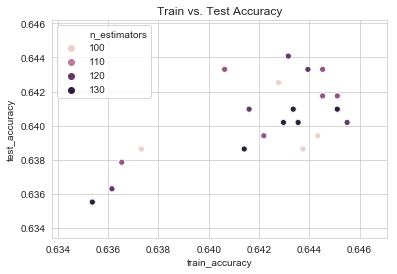

In [36]:
%matplotlib inline
sns.set_style("whitegrid")
sns.scatterplot(x='train_accuracy', y='test_accuracy', hue='n_estimators', data = rfc_pd)\
.set_title('Train vs. Test Accuracy')

/Users/chuamelia/anaconda/envs/py35/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Model AUC by \nmin_samples_split & n_estimators')

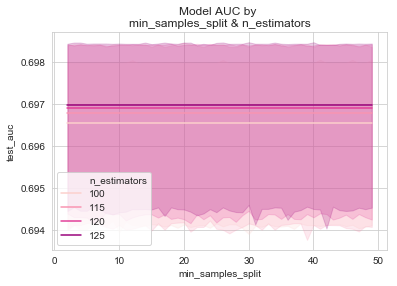

In [37]:
%matplotlib inline
sns.set_style("whitegrid")
sns.lineplot(x='min_samples_split', y='test_auc', 
             hue='n_estimators', palette = sns.color_palette("RdPu", 4), data = rfc_pd)\
.set_title('Model AUC by \nmin_samples_split & n_estimators')

/Users/chuamelia/anaconda/envs/py35/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Model R2 by \nmin_samples_split & n_estimators')

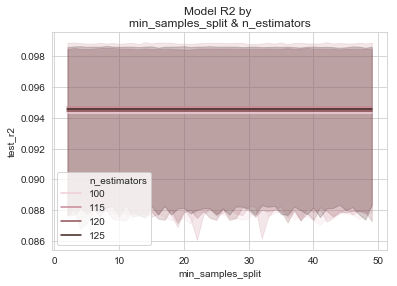

In [45]:
%matplotlib inline
sns.set_style("whitegrid")
colors = sns.color_palette("RdPu", len(estimators))
sns.lineplot(x='min_samples_split', y='test_r2', 
             hue='n_estimators', palette = reds, data = rfc_pd_og)\
.set_title('Model R2 by \nmin_samples_split & n_estimators')

In [ ]:
%matplotlib inline
sns.set_style("whitegrid")
colors = sns.color_palette("RdPu", len(estimators))
sns.lineplot(x='min_samples_split', y='test_accuracy', hue='n_estimators', palette = , data = rfc_pd)\
.set_title('Model R2 by \nmin_samples_split & n_estimators')